# Imports

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Loading the Data

In [68]:
# Loading the dataset
df = pd.read_csv("bitcoin_price.csv")
# df1 = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)
# df1.index
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [69]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [70]:
#Select the Bitcoin data for Nov 2021 
df.loc['2021-11']


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,24726754302
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721


In [71]:
#Resampling the data monthly and calculating the mean
df.resample('ME').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10


# Exploring the data

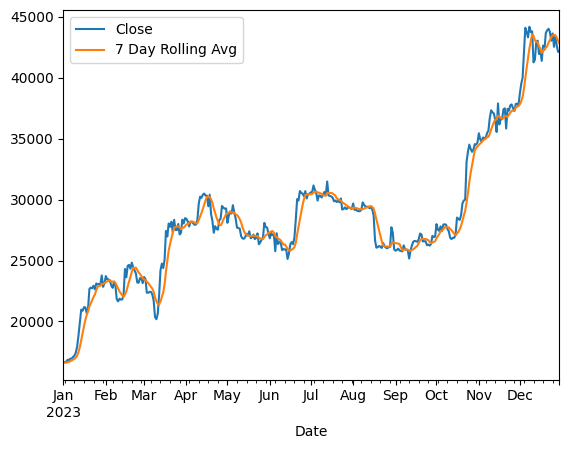

In [72]:
#7 Day Rolling Average of the closing price
df['7 Day Rolling Avg'] = df['Close'].rolling(window=7).mean()
df.loc['2023', ['Close', '7 Day Rolling Avg']].plot()
plt.show()

In [73]:
#Find out the highest average month
df.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [74]:
#Calculate Daily Returns
df['Daily returns'] = df['Close'].pct_change()*100

In [75]:
# Days with more than 10% change in closing price
df[abs(df['Daily returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7 Day Rolling Avg,Daily returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


# Data Visualization

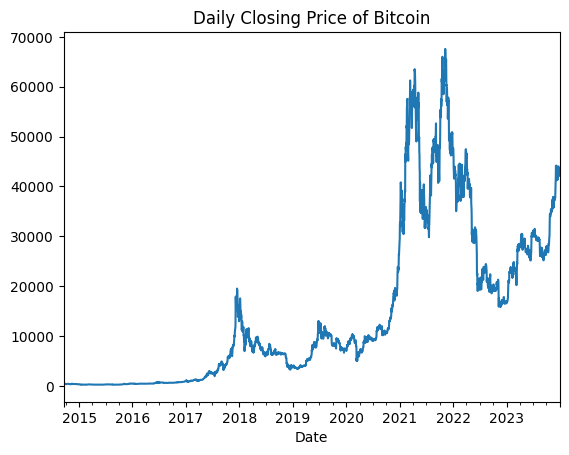

In [76]:
# Daily closing price plot
df['Close'].plot(title='Daily Closing Price of Bitcoin')
plt.show()

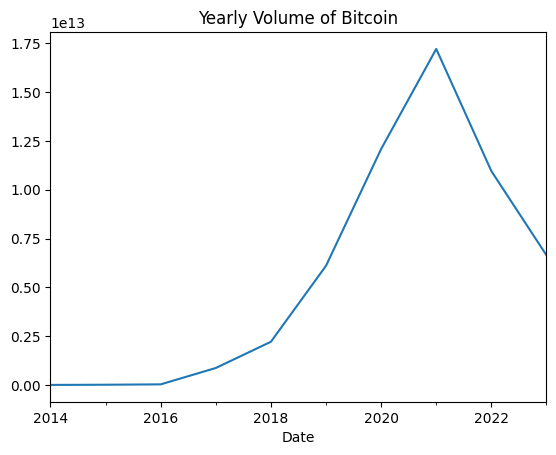

In [77]:
# Plot the yearly volume

df.resample('YE').sum()['Volume'].plot(title='Yearly Volume of Bitcoin')
plt.show()

Text(0, 0.5, '30 Day Rolling Volume')

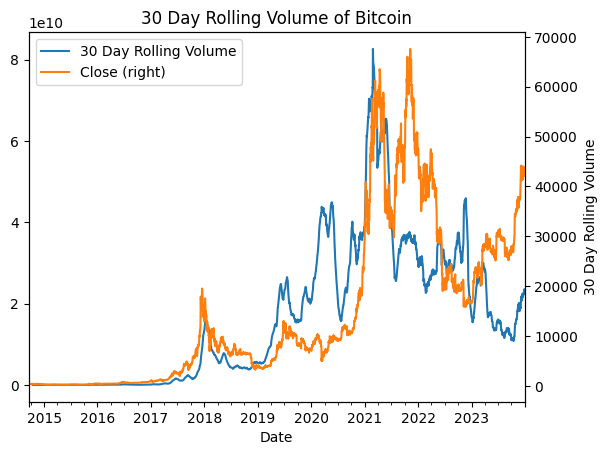

In [78]:
# Plot Closing Price and 30 Day Rolling Volume
df['30 Day Rolling Volume'] = df['Volume'].rolling(window=30).mean()
df['30 Day Rolling Volume'].plot(legend=True, title='30 Day Rolling Volume of Bitcoin')
ax = df['Close'].plot(secondary_y=True, legend=True)
ax.set_ylabel('30 Day Rolling Volume')

In [79]:
# Plotting the correlation between Closing Price and 30 Day Rolling Volume
df[['Close', '30 Day Rolling Volume']].corr()


,Close,30 Day Rolling Volume
Close,1.000000,0.750445
30 Day Rolling Volume,0.750445,1.000000


# Data Manipulation

In [80]:
# Identify the missing values
df.isnull().sum()

# Fill missing values with the previous value
df['30 Day Rolling Volume'].bfill(inplace=True)
df.isnull().sum()

# Interpolate missing values in 7 day rolling average
df['7 Day Rolling Avg'] = df['7 Day Rolling Avg'].interpolate(method='linear')
df.isnull().sum()


Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
7 Day Rolling Avg        6
Daily returns            1
30 Day Rolling Volume    0
dtype: int64

In [81]:
# Extract Time Variables
df['Year'] = df.index.year
df['Month'] = df.index.month 
df['Day'] = df.index.day   
df['Day of Week'] = df.index.dayofweek
df['Weekday'] = df.index.day_name()
df['Weekend'] = df.index.weekday >= 5



df.head()


,Open,High,Low,Close,Adj Close,Volume,7 Day Rolling Avg,Daily returns,30 Day Rolling Volume,Year,Month,Day,Day of Week,Weekday,Weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,True


In [82]:
# Feature Engineering - Lagged Values
for lag in range(1, 8):
    df[f'Close_Lag_{lag}'] = df['Close'].shift(lag)

# Seasonality

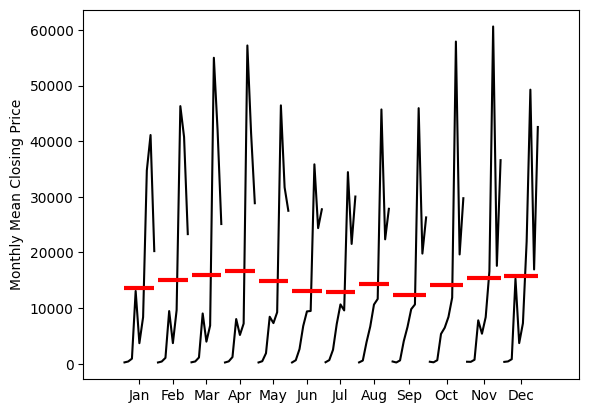

In [83]:
# Plotting monthly seasonality
month_plot(df['Close'].resample('ME').mean(), ylabel='Monthly Mean Closing Price')
plt.show()

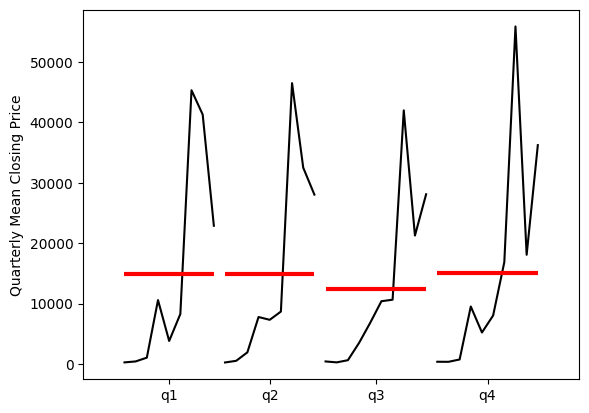

In [84]:
# Plotting quaterly seasonality
quarter_plot(df['Close'].resample('QE').mean(), ylabel='Quarterly Mean Closing Price')
plt.show()

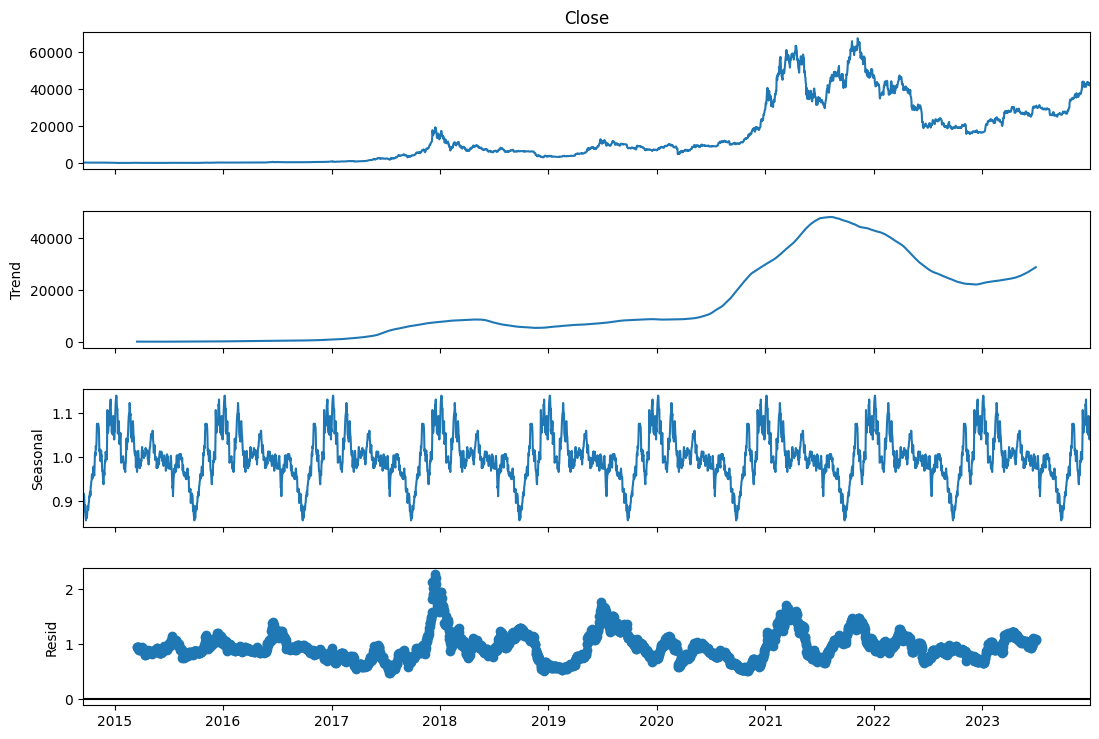

In [85]:
# Decomposing the time series (Bitcoin Closing Price)
result = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()


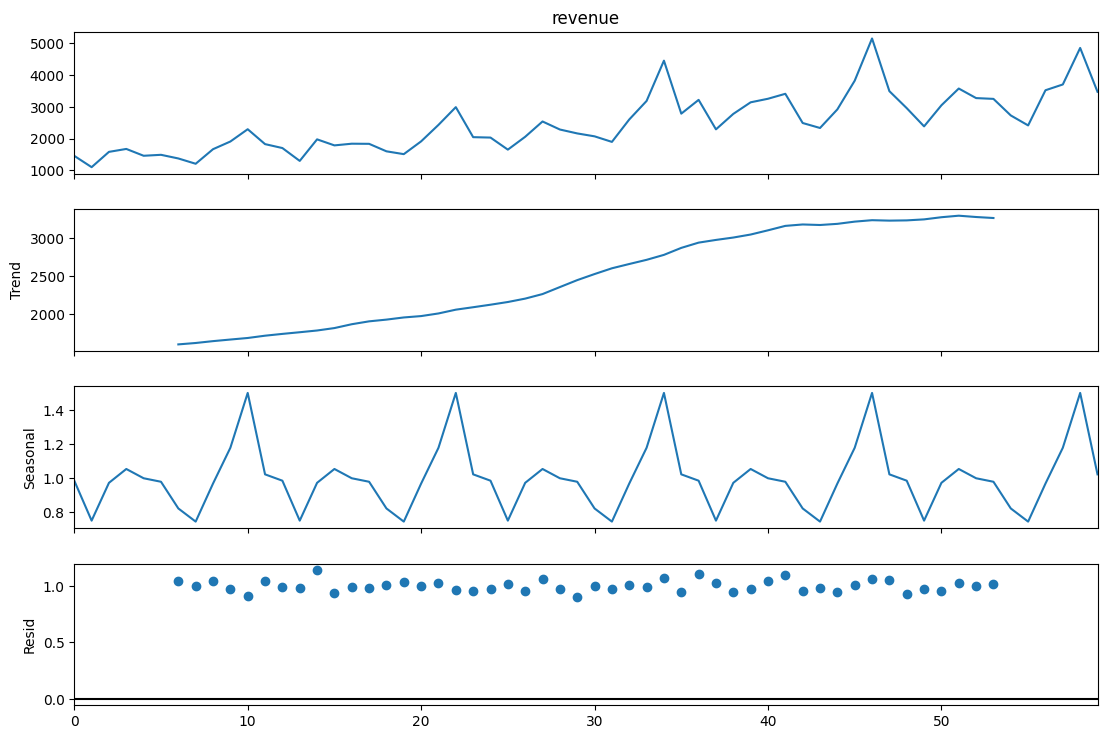

In [86]:
# Decomposing the time series (Choco Dataset)

df1 = pd.read_csv("choco_monthly_revenue.csv")
result = seasonal_decompose(df1['revenue'], model='multiplicative', period=12)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

# Seasonality periods
- 24 for Hourly Data
- 7 or 365 for Daily Data (7 preferred for modelling)
- 52 for Weekly data
- 12 for Monthly Data
- 4 for Quarterly Data
- 5 for Weekdays


# Auto-Correlation

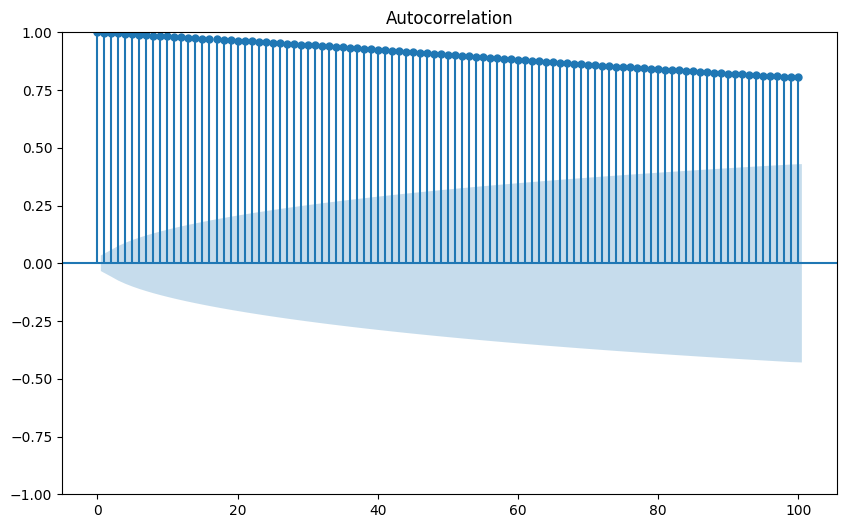

In [87]:
# Plot the ACF of the Bitcoin Closing Price
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['Close'].dropna(), lags=100, ax=ax)
plt.show()

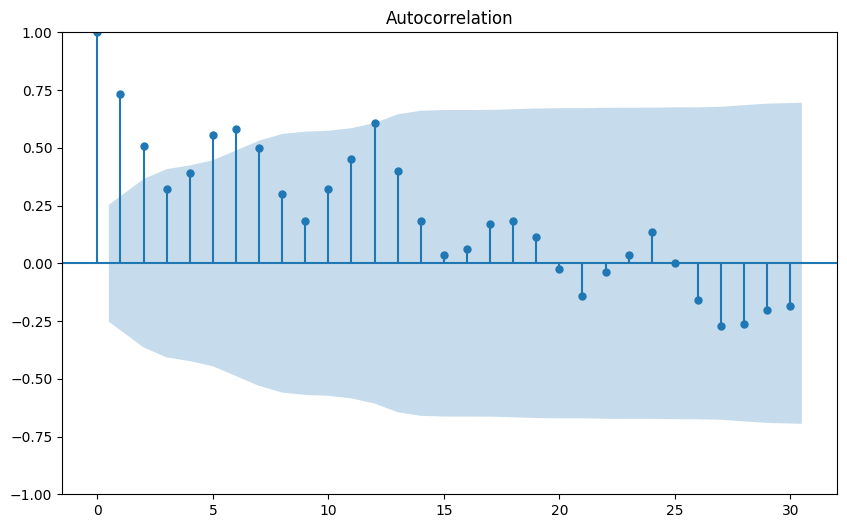

In [88]:
# Plot the ACF of the Choco Revenue
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df1['revenue'].dropna(), lags=30, ax=ax)
plt.show()

# Partial Auto-Correlation Function

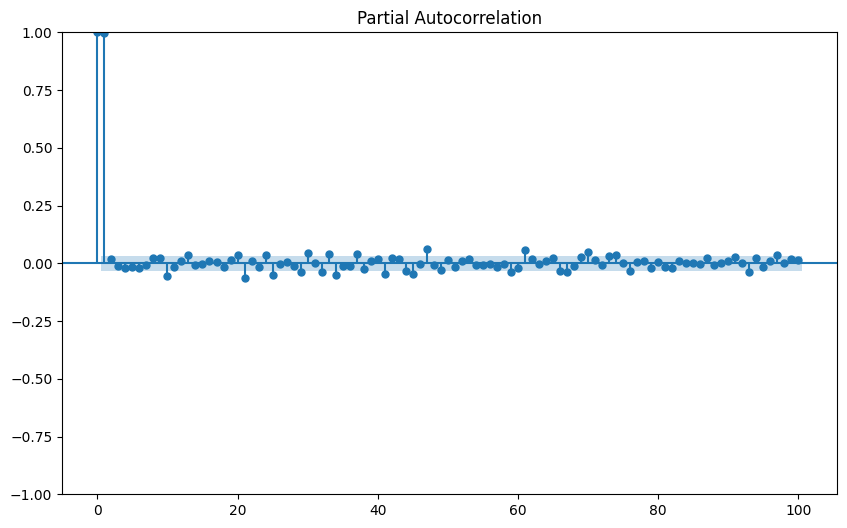

In [ ]:
# Plot the PACF of the Bitcoin Closing Price
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['Close'].dropna(), lags=100, ax=ax)
plt.show()

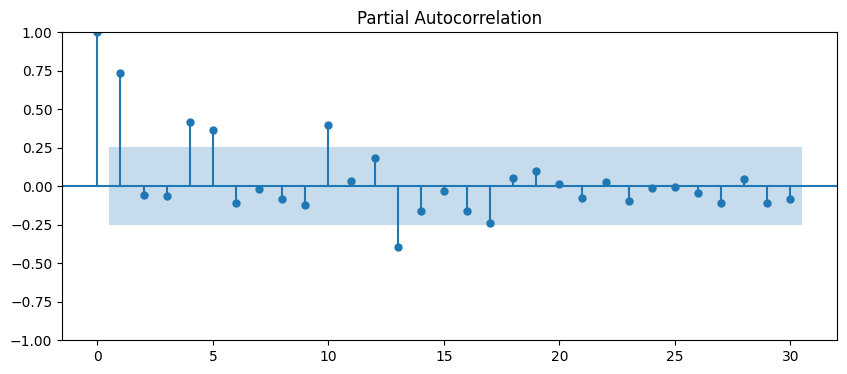

In [91]:
# Plot the PACF of the Choco Revenue
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(df1['revenue'].dropna(), lags=30, ax=ax)
plt.show()